In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
house= pd.read_csv(r"house_data.csv")

In [3]:
house.shape

(21613, 14)

In [4]:
house.info

<bound method DataFrame.info of           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       condition  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0              3        1180       

In [5]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [6]:
house.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
house.shape

(21613, 14)

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [9]:
label_data = house.copy()

In [10]:
house.price.std()

367362.23171800975

In [11]:
house.price.mean()

540182.1587933188

In [12]:
upperlimit=label_data.price.mean() + 3* label_data.price.std() 
lowerlimit=label_data.price.mean() - 3* label_data.price.std() 
print("up:",upperlimit)
print("ll:",lowerlimit)

up: 1642268.853947348
ll: -561904.5363607104


In [13]:
label_data.loc[(label_data.price > upperlimit) | (label_data.price < lowerlimit)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
21,2000000.0,3,2.75,3050,44867,1.0,3,2330,720,1968,0,98040,4110,20336
153,2250000.0,4,3.25,5180,19850,2.0,3,3540,1640,2006,0,98006,3160,9750
246,2400000.0,4,2.50,3650,8354,1.0,3,1830,1820,2000,0,98074,3120,18841
269,2900000.0,4,3.25,5050,20100,1.5,3,4750,300,1982,2008,98004,3890,20060
282,2050000.0,5,3.00,3830,8480,2.0,5,2630,1200,1905,1994,98122,3050,7556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,1870000.0,4,3.75,3790,8797,2.0,3,3290,500,2006,0,98039,2660,12150
21530,3000000.0,4,3.75,5090,14823,1.0,3,4180,910,2013,0,98004,3030,12752
21540,1880000.0,5,3.50,4410,13000,2.0,3,2920,1490,2014,0,98006,5790,12969
21568,1700000.0,4,3.50,3830,8963,2.0,3,3120,710,2014,0,98004,2190,10777


In [14]:
new_label_data=label_data.loc[(label_data.price <= upperlimit) & (label_data.price >= lowerlimit)]
print("before removing ouliers:",len(label_data))
print("after removing ouliers:",len(new_label_data))
print("outliers:",len(label_data)-len(new_label_data))

before removing ouliers: 21613
after removing ouliers: 21207
outliers: 406


<Axes: >

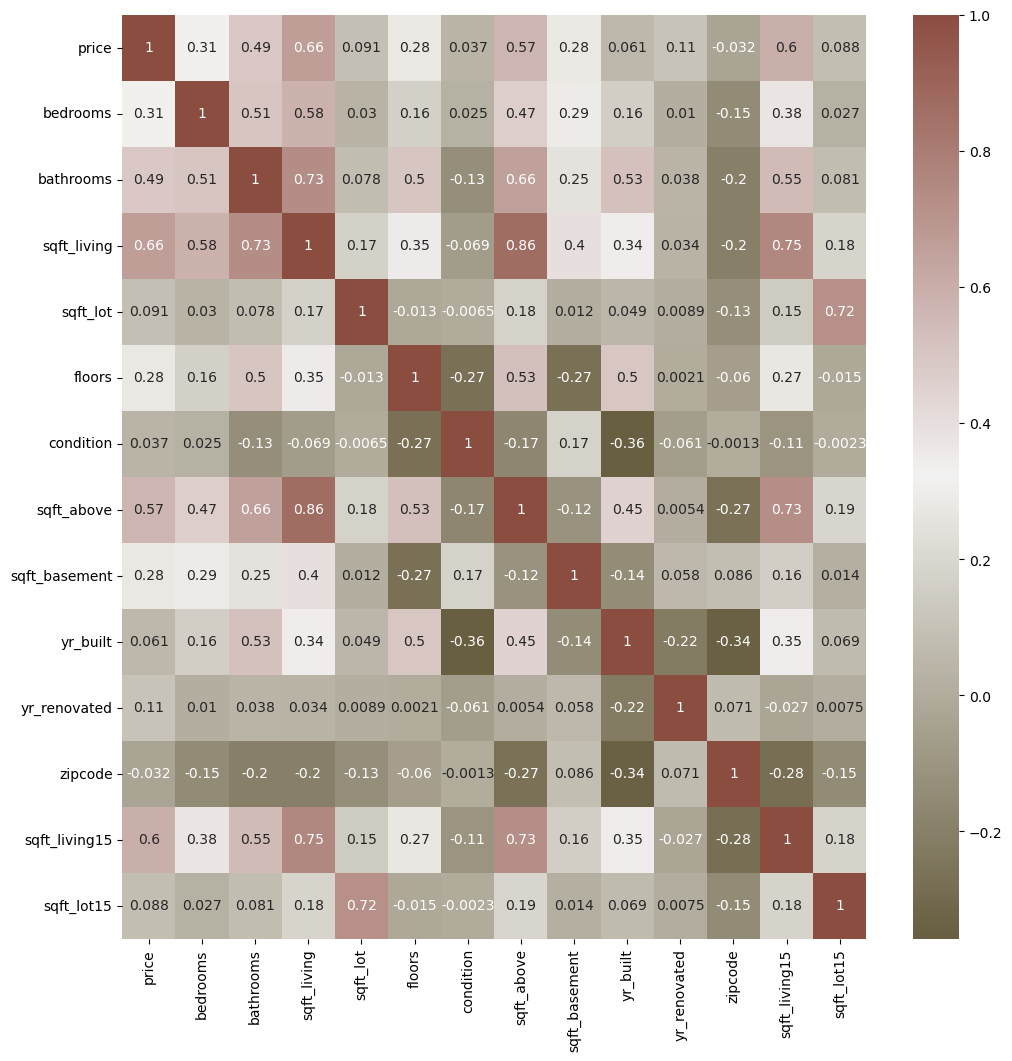

In [15]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= new_label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [16]:
X= new_label_data.drop(["price"],axis =1)
y= new_label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [17]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for bedrooms is -32797.912589513406
The coefficient for bathrooms is 49525.461866441554
The coefficient for sqft_living is 100.38093485063789
The coefficient for sqft_lot is 0.10862016720242314
The coefficient for floors is 71544.2000668338
The coefficient for condition is 22702.65731441439
The coefficient for sqft_above is 39.7529738720644
The coefficient for sqft_basement is 60.62796086543564
The coefficient for yr_built is -2449.6143353359757
The coefficient for yr_renovated is 21.821250324549325
The coefficient for zipcode is 287.50096434609907
The coefficient for sqft_living15 is 119.34922377433303
The coefficient for sqft_lot15 is -0.34839865639497586


In [19]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -23563961.867891625


In [20]:
regression_model.score(X_train, y_train)

0.5511160801687681

In [21]:
regression_model.score(X_test, y_test)

0.5393334617182861

C:\Users\User\AppData\Local\Temp\ipykernel_11828\3168398915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


<Axes: xlabel='price', ylabel='Density'>

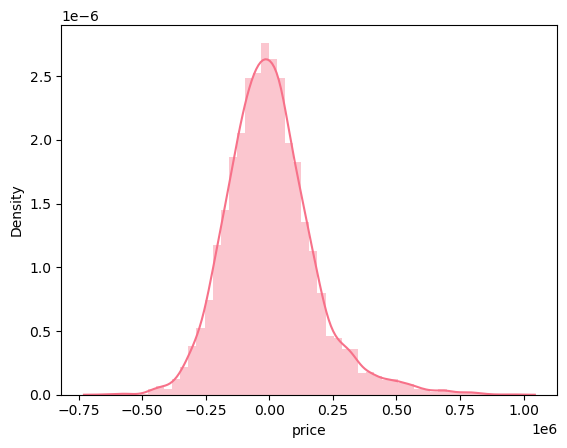

In [23]:
sns.distplot((y_test-y_pred),bins=50)

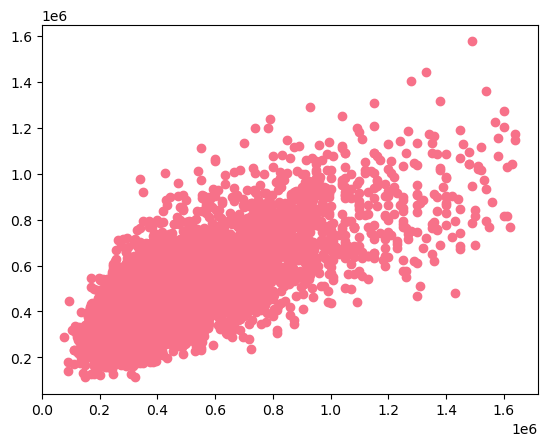

In [24]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)